In [ ]:
# Description : Ce programme détecte si un e-mail est un spam (1) ou pas (0)

In [10]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(5728, 2)

In [4]:
# Get the columns names
dataset.columns

Index(['text', 'spam'], dtype='object')

In [5]:
# Check for duplicates and remove them
dataset.drop_duplicates (inplace = True)

In [6]:
# Show the new shape
dataset.shape

(5695, 2)

In [7]:
# Show 

In [8]:
# Show dataset head (first 5 records)
dataset.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [12]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
# Show dataset statistics
dataset.describe()

,spam
count,5695.000000
mean,0.240211
std,0.427249
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
# Data Visualization

# Visualize spam  frequenices
#plt.figure(dpi=100)
#sns.countplot(dataset['spam'])
#plt.title("Spam Freqencies")
#plt.show()

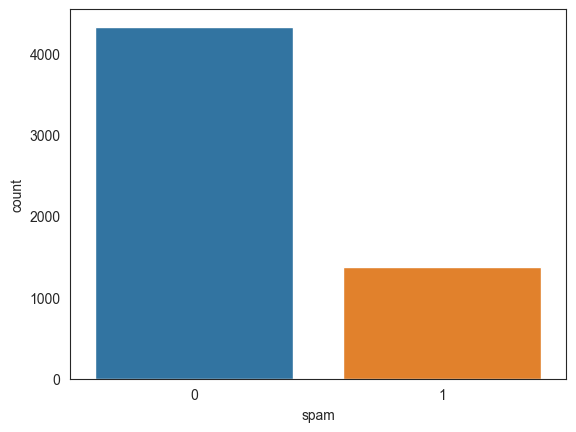

In [11]:
# Data Visualization

# count plot on single categorical variable
sns.countplot(x ='spam', data = dataset)
# Show the plot
plt.show()

In [12]:
# Data Cleaning
# Check for missing data for each column 
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [13]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [14]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [11]:
# Fit the CountVectorizer to data
vectorizer = CountVectorizer(analyzer=process)
message = vectorizer.fit_transform(dataset['text'])

NameError: name 'process' is not defined

In [18]:
# Get the shape of message
message.shape

(5695, 37229)

In [7]:
# Save the vectorizer
dump(vectorizer, open("models/vectorizer.pkl", "wb"))

NameError: name 'vectorizer' is not defined

In [20]:
# Split the data into training and testing sets
vect1=pickle.load(open("models/vectorizer.pkl","rb"))
    #test_data_features = vect1.transform(clean_test_Descriptions)
X_train, X_test, y_train, y_test = train_test_split(vect1, dataset['spam'], test_size=0.20, random_state=0)

In [21]:
# Model creation
model = MultinomialNB()

In [22]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [23]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [24]:
# Model Evaluation | Accuracy NB
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [25]:
# Model Evaluation | Classification report NB
md = classification_report(y_test, y_pred)
print (md)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



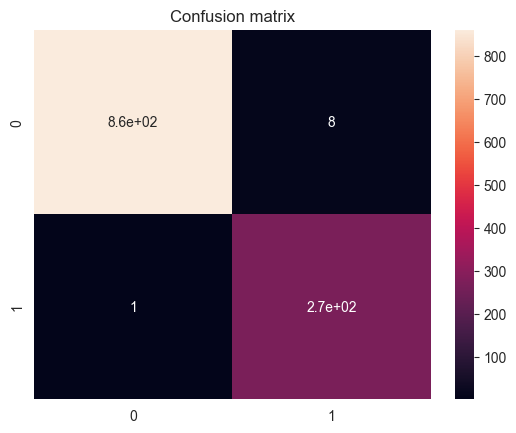

In [26]:
# Model Evaluation | Confusion matrix NB
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [27]:
# Model Evaluation | SVC

# Fit du  Training set SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)
# Model Evaluation | Accuracy SVC
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

KeyboardInterrupt: 

In [ ]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

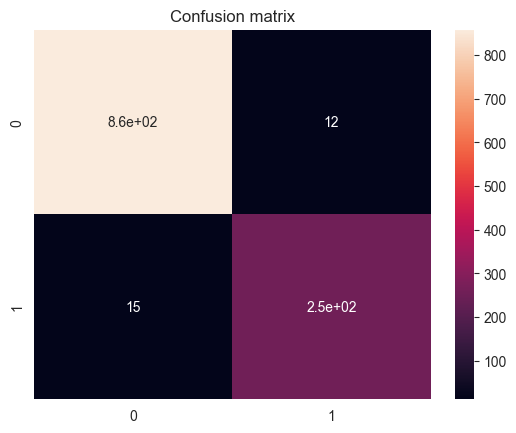

In [20]:
# Model Evaluation | Confusion matrix SVC
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [21]:
# Model Evaluation | Classification report SVC
md = classification_report(y_test, y_pred)
print (md)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       870
           1       0.95      0.94      0.95       269

    accuracy                           0.98      1139
   macro avg       0.97      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139



Predicting New Emails

In [1]:
# Example of Nigerian Scam email
msg1 = '''Sir, we are honourably seeking your assistance in the following ways.
        1) To provide a Bank account where this money would be transferred to.
        2) To serve as the guardian of this since I am a girl of 26 years.
        Moreover Sir, we are willing to offer you 15% of the sum as compensation for effort input after the successful transfer of this fund to your designate account overseas. please feel free to contact ,me via this email address
        wumi1000abdul@yahoo.comAnticipating to hear from you soon.Thanks and God Bless.'''

# Note from Professor regarding Python + Tableau for plotting flight pattern
msg2 = '''I've mentioned that Python is widely used for data pre-processing tasks. 
        Here's a really nice use of Python for preparing flight data for plotting in Tableau. 
        The same principles can be used for plotting all kinds of geographic related "routes". 
        Plus, you learn about KML files and working with spatial data.'''

In [2]:
from nltk.tokenize import word_tokenize

In [8]:
def createWordFeatures(words):
    my_dict = dict( [ (word, True) for word in words] )
    return my_dict

In [69]:
#vect1=pickle.load(open("models/vectorizer.pkl","rb"))
words = word_tokenize(msg1)
features = createWordFeatures(words)
with open('models/model.pkl', 'rb') as f:
    nb_classifier = pickle.load(f)
    #sdf = nb_classifier.transform(msg1).reshape(1, -1)
print("Message 1 is" ,nb_classifier.predict(features))

ValueError: Expected 2D array, got scalar array instead:
array={'Sir': True, ',': True, 'we': True, 'are': True, 'honourably': True, 'seeking': True, 'your': True, 'assistance': True, 'in': True, 'the': True, 'following': True, 'ways': True, '.': True, '1': True, ')': True, 'To': True, 'provide': True, 'a': True, 'Bank': True, 'account': True, 'where': True, 'this': True, 'money': True, 'would': True, 'be': True, 'transferred': True, 'to': True, '2': True, 'serve': True, 'as': True, 'guardian': True, 'of': True, 'since': True, 'I': True, 'am': True, 'girl': True, '26': True, 'years': True, 'Moreover': True, 'willing': True, 'offer': True, 'you': True, '15': True, '%': True, 'sum': True, 'compensation': True, 'for': True, 'effort': True, 'input': True, 'after': True, 'successful': True, 'transfer': True, 'fund': True, 'designate': True, 'overseas': True, 'please': True, 'feel': True, 'free': True, 'contact': True, 'me': True, 'via': True, 'email': True, 'address': True, 'wumi1000abdul': True, '@': True, 'yahoo.comAnticipating': True, 'hear': True, 'from': True, 'soon.Thanks': True, 'and': True, 'God': True, 'Bless': True}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
#journal_entry = journals['journal_entry']
with open('models/vectorizer.pkl', 'rb') as f:
  vec = pickle.load(f)
fileName = 'models/model.pkl'
loaded_model = pickle.load(open(fileName,"rb"))
df = pd.Series(msg1)
vec = TfidfVectorizer()
#vect = vec.fit(df)
vec = vec.fit_transform(df).reshape(1, -1)
#message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])
#sdf = transform(df).reshape(1, -1)

# Get missing columns in the training test
#missing_cols = 37229 - set( vec.columns )
#missing_cols = 37229 - 64
# Add a missing column in test set with default value equal to 0
#for c in range(missing_cols):
    #vec[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
#vec = vec[37229]

prediction = loaded_model.predict(vec)
print("Prediction : ",prediction)
if(prediction==0):
  print("Message is not a spam!")

else:
  print("Message is a SPAM!")

ValueError: X has 64 features, but MultinomialNB is expecting 37229 features as input.

In [3]:
with open('models/vectorizer.pkl', 'rb') as f:
  vec = pickle.load(f)

fileName = 'models/model.pkl'
loaded_model = pickle.load(open(fileName, 'rb'))

msg1 = "Ton message iciiciiiiiiiiiii"
df = pd.Series(msg1)

#vec = vec.transform(df)
vec.transform(df)

prediction = loaded_model.predict(vec)
print("Prediction:", prediction)

if prediction == 0:
  print("Message is not a spam!")
else:
  print("Message is a spam!")

NameError: name 'pickle' is not defined

In [11]:
print (vec)

  (0, 3638)	1
  (0, 23369)	1
  (0, 18841)	1
  (0, 10065)	1
  (0, 17696)	1
  (0, 21140)	1
  (0, 27986)	1
  (0, 16674)	1
  (0, 28110)	1
  (0, 9296)	3
  (0, 21654)	2
  (0, 15429)	1
  (0, 32602)	1
  (0, 18238)	1
  (0, 18886)	1
  (0, 16089)	2
  (0, 8054)	1
  (0, 20952)	3
  (0, 32319)	1
  (0, 31968)	1
  (0, 24838)	1
  (0, 36025)	2
  (0, 21431)	2
  (0, 33037)	1
  (0, 23040)	2
  :	:
  (5694, 24818)	2
  (5694, 21624)	1
  (5694, 5729)	9
  (5694, 30934)	1
  (5694, 2828)	3
  (5694, 13338)	1
  (5694, 13127)	1
  (5694, 17388)	1
  (5694, 14130)	1
  (5694, 20273)	1
  (5694, 31827)	1
  (5694, 13128)	1
  (5694, 20467)	1
  (5694, 35288)	1
  (5694, 8629)	1
  (5694, 30082)	1
  (5694, 13522)	5
  (5694, 36185)	1
  (5694, 959)	2
  (5694, 2797)	1
  (5694, 30287)	1
  (5694, 17590)	1
  (5694, 33923)	1
  (5694, 10373)	1
  (5694, 11386)	1


In [34]:
fileName = 'models/model.pkl'
loaded_model = pickle.load(open(fileName,"rb"))

In [40]:
def predictMessage(self,msg1):
		"""
		Function
		--------
		predictMessage

		Classify the message by telling if it is a ham or spam.

		Parameters
		----------
		msg : str
		A message we want to classify
		
		Returns
		-------
		str: 'ham' or 'spam'
		
		Example
		-------
		message = "Hi welcome to this session, please log in using your username and password then click on the start button."
		predictMessage(message)
		
		'ham'
		"""
		#fileName = 'nb_model.sav'
		#fileName = 'models/model.pkl'
		#loaded_model = pickle.load(open(fileName, 'rb'))
        #loaded_model = pickle.load(open(fileName,"rb"))
	    #output_msg = ""
		words = word_tokenize(msg1)
		output_msg = dict( [ (word, True) for word in words] )
		return loaded_model.classify(output_msg)

In [41]:
from nltk.stem import WordNetLemmatizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
from preprocess import pre_process
from train import add_feature

In [42]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
lemmatizer = WordNetLemmatizer()
#message = sys.argv[1]
message = msg1

message = message.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
# Remove punctuation
message = message.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space
message = message.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
message = message.replace(r'^\s+|\s+?$', '')
message = message.lower()
# remove stopwords from messages
stop_words = set(stopwords.words('english'))
for words in message.split(" "):
  temp = []
  if words not in stop_words:
    temp.append(lemmatizer.lemmatize(words))
  message = " ".join(temp)

df = pd.Series(message)

#with open("./vect.pkl","rb") as f:
with open("models/vectorizer.pkl","rb") as f:
  
  vect = pickle.load(f)

#message_transformed = vect.fit_transform(df)

vect = TfidfVectorizer()
message_transformed = vect.fit_transform(df)

message_len = df.apply(len)
message_digits = df.str.count(r'\d')
message_non = df.str.count(r'\W')

message1 = add_feature(message_transformed,message_len)
message2 = add_feature(message1,message_digits)
message_vect = add_feature(message2,message_non)

with open('models/model.pkl', 'rb') as f:
    clf = pickle.load(f)

prediction = clf.predict(message_vect)
print("Prediction : ",prediction)
if(prediction==0):
  print("Message is not a spam!")

else:
  print("Message is a SPAM!")

ValueError: X has 4 features, but MultinomialNB is expecting 37229 features as input.